In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

In [3]:
fruits=pd.read_excel('c:/data/fruits.xlsx')
fruits.head()

,Color,Sphericity,Weight,labels
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [4]:
fruits.shape,fruits.ndim,fruits.dtypes

((60, 4),
 2,
 Color          object
 Sphericity    float64
 Weight          int64
 labels         object
 dtype: object)

In [5]:
fruits.labels.value_counts()

Apple     30
Orange    30
Name: labels, dtype: int64

In [7]:
fruits.Color.value_counts()

Green              20
Reddish yellow     10
Orange             10
Greenish yellow    10
Red                10
Name: Color, dtype: int64

In [9]:
fruits.groupby(['Color','labels']).count()

Sphericity  Weight
Color           labels                    
Green           Apple           10      10
                Orange          10      10
Greenish yellow Orange          10      10
Orange          Orange          10      10
Red             Apple           10      10
Reddish yellow  Apple           10      10

In [10]:
fruits[['Sphericity','Weight']].describe()

,Sphericity,Weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


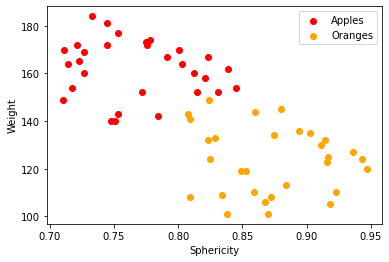

In [16]:
plt.scatter(x='Sphericity',y='Weight',data=fruits[fruits.labels=='Apple'],label='Apples',c='red')
plt.scatter(x='Sphericity',y='Weight',data=fruits[fruits.labels=='Orange'],label='Oranges',c='orange')
plt.legend()
plt.xlabel('Sphericity')
plt.ylabel('Weight')
plt.show()

In [17]:
X=fruits[['Sphericity','Weight']]
y=fruits['labels']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((45, 2), (15, 2), (45,), (15,))

In [49]:
X_test.index,y_test.index

(Int64Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'),
 Int64Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'))

In [50]:
X_train.index,y_train.index

(Int64Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19,
             34,  5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8,
             55, 52, 48, 29, 25, 28, 49,  0, 15, 36,  9],
            dtype='int64'),
 Int64Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19,
             34,  5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8,
             55, 52, 48, 29, 25, 28, 49,  0, 15, 36,  9],
            dtype='int64'))

In [51]:
y_train.value_counts(),y_test.value_counts()

(Apple     24
 Orange    21
 Name: labels, dtype: int64,
 Orange    9
 Apple     6
 Name: labels, dtype: int64)

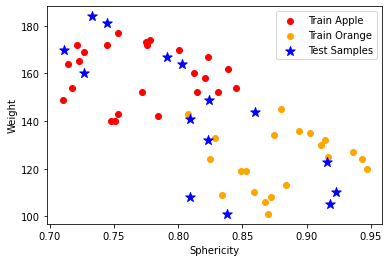

In [52]:
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apple')
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Orange')
plt.scatter(x='Sphericity',y='Weight',data=X_test,c='blue',label='Test Samples',marker='*',s=100)
plt.legend()
plt.xlabel('Sphericity')
plt.ylabel('Weight')
plt.show()

In [74]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [77]:
y_test.values

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [65]:
print(export_text(clf,feature_names=['Sphericity','Weight'],decimals=3,show_weights=True))

|--- Weight <= 138.000
|   |--- weights: [0.000, 19.000] class: Orange
|--- Weight >  138.000
|   |--- Weight <= 147.000
|   |   |--- Sphericity <= 0.796
|   |   |   |--- weights: [4.000, 0.000] class: Apple
|   |   |--- Sphericity >  0.796
|   |   |   |--- weights: [0.000, 2.000] class: Orange
|   |--- Weight >  147.000
|   |   |--- weights: [20.000, 0.000] class: Apple



In [78]:
X_test

,Sphericity,Weight
31,0.711,170
3,0.916,123
38,0.733,184
27,0.860,144
21,0.824,149
17,0.823,132
46,0.803,164
2,0.923,110
23,0.809,141
26,0.809,108


In [88]:
confusion_matrix(y_test,y_predict)

array([[6, 0],
       [1, 8]], dtype=int64)

In [87]:
accuracy_score(y_test,y_predict)

0.9333333333333333

In [83]:
pd.DataFrame(confusion_matrix(y_test,y_predict),index=['Apple','Orange'],columns=['Apple','Orange'])

,Apple,Orange
Apple,6,0
Orange,1,8


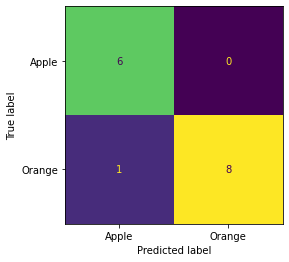

In [92]:
plot_confusion_matrix(clf,X_test,y_test,colorbar=False)
plt.show()

In [98]:
result=(export_text(clf,feature_names=['Sphericity','WEight'],decimals=3,show_weights=True))
print(result)

|--- WEight <= 138.000
|   |--- weights: [0.000, 19.000] class: Orange
|--- WEight >  138.000
|   |--- WEight <= 147.000
|   |   |--- Sphericity <= 0.796
|   |   |   |--- weights: [4.000, 0.000] class: Apple
|   |   |--- Sphericity >  0.796
|   |   |   |--- weights: [0.000, 2.000] class: Orange
|   |--- WEight >  147.000
|   |   |--- weights: [20.000, 0.000] class: Apple



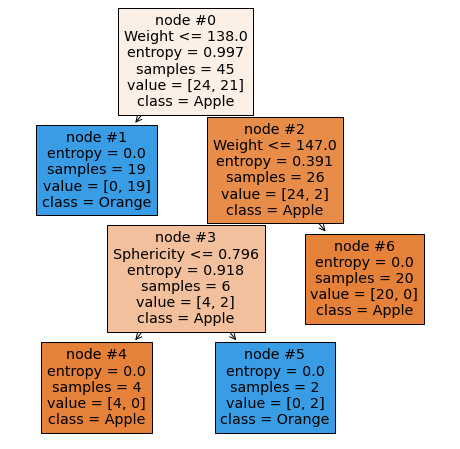

In [93]:
plt.figure(figsize=[8,8])
plot_tree(clf,feature_names=['Sphericity','Weight'],class_names=['Apple','Orange'])
plt.show()

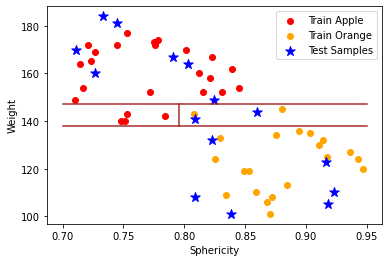

In [94]:
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Apple'],c='red',label='Train Apple')
plt.scatter(x='Sphericity',y='Weight',data=X_train[y_train=='Orange'],c='orange',label='Train Orange')
plt.scatter(x='Sphericity',y='Weight',data=X_test,c='blue',label='Test Samples',marker='*',s=100)
plt.plot([0.7,0.95],[138,138],c='brown')
plt.plot([0.7,0.95],[147,147],c='brown')
plt.plot([0.796,0.796],[138,147],c='brown')
plt.legend()
plt.xlabel('Sphericity')
plt.ylabel('Weight')
plt.show()